# Chargement des données

In [1]:
import pandas as pd

avis_restaurants = pd.read_csv('D:/M2 SISE/Text Mining ou NLP/Projet/nlp_text_mining/Data/avis_restaurants_cleaned.csv') 

In [2]:
avis_restaurants

,restaurant,restaurant_address,title,user_profile,date_review,rating,type_visit,num_contributions,review,review_cleaned,year,month,day
0,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Très belle soirée,SetC77,2024-12-16,5.0,friends,67,"Trop bon moment!! \nAccueil, plats, ambiance t...",trop bon moment accueil plat ambiance tout pas...,2024,12,16
1,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Vive la bonne cuisine dans une ambiance conviv...,H3293ZGsylviel,2024-11-26,5.0,friends,2,"Toujours aussi goûteux !\nL'ambiance, la bonne...",toujours aussi goûteux lambiance bonne humeur ...,2024,11,26
2,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Sans plus,marieno_lleb739,2024-11-23,3.0,friends,96,Les serveurs et serveuses sont sympas. Mais l’...,serveurs serveuses sympas longlet nest tendre ...,2024,11,23
3,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Bon et joyeux,Vymsbmm,2024-11-14,5.0,friends,225,Une excellente soirée dans ce petit restaurant...,excellente soirée petit restaurant peu lécart ...,2024,11,14
4,Le Bouchon des Filles,"20 Rue Sergent-Blandan Parking Sathonay, 69001...",Bon restaurant et endroit pour se retrouver en...,Youliic974,2024-11-01,4.0,friends,38,Un super moment entre amis.\nLes plats étaient...,super moment entre amis plat très délicieux co...,2024,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17155,Le Bouchon Sully,"20, rue Sully, 69006 Lyon France",C est variable,Del6901,2015-07-10,3.0,business,16,Ns sommes allés plusieures fois ds ce restaura...,somme allés plusieures fois restaurant bilan a...,2015,7,10
17156,Le Bouchon Sully,"20, rue Sully, 69006 Lyon France",Très moyen,quantis38,2015-06-10,2.0,friends,11,Service très lent et pas réactif du tout. Cuis...,service très lent réactif tout cuisine correct...,2015,6,10
17157,Le Bouchon Sully,"20, rue Sully, 69006 Lyon France",excellent,dlc2009lcd,2015-05-05,5.0,family,1,excellent bouchon lyonnais cuisine de qualite ...,excellent bouchon lyonnais cuisine qualite tre...,2015,5,5
17158,Le Bouchon Sully,"20, rue Sully, 69006 Lyon France",excellent,303gaellep,2015-04-24,5.0,family,2,"Très bonne cuisine, service impeccable. Le ser...",très bonne cuisine service impeccable serveur ...,2015,4,24


# Analyse de Sentiment

In [3]:
avis_restaurants['sentiment_rating'] = avis_restaurants['rating'].apply(
    lambda x: 'Positif' if x > 3 else ('Négatif' if x < 3 else 'Neutre')
)

In [4]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convertir les ratings en 3 classes : Négatif (0), Positif (1), Neutre (2)
def sentiment_class(rating):
    if rating == 3:
        return 2  # Neutre
    elif rating >= 4:
        return 1  # Positif
    else:
        return 0  # Négatif

# Appliquer la fonction de conversion
avis_restaurants['sentiment'] = avis_restaurants['rating'].apply(sentiment_class)

# Tokenisation des avis
tokenizer = Tokenizer(num_words=10000)  # Limite de vocabulaire à 10,000 mots
tokenizer.fit_on_texts(avis_restaurants['review_cleaned'])
X = tokenizer.texts_to_sequences(avis_restaurants['review_cleaned'])

# Padding des séquences pour avoir des longueurs égales
X_pad = pad_sequences(X, padding='post', maxlen=200)  # Limite de 200 mots par avis

# Cibles (sentiment)
y = avis_restaurants['sentiment']

In [5]:
# Séparation en jeu d'entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Création du modèle LSTM pour 3 classes
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))  # Couche d'embedding
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Couche LSTM
model.add(Dense(3, activation='softmax'))  # 3 classes, activation softmax pour la classification multi-classes

# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Évaluation du modèle
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # La classe avec la probabilité la plus élevée

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)  
print(f"Précision du modèle LSTM : {accuracy * 100:.2f}%")

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 78s 332ms/step - accuracy: 0.8197 - loss: 0.6344 - val_accuracy: 0.8170 - val_loss: 0.6033
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 68s 316ms/step - accuracy: 0.8202 - loss: 0.5974 - val_accuracy: 0.8170 - val_loss: 0.6034
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 70s 326ms/step - accuracy: 0.8153 - loss: 0.6071 - val_accuracy: 0.8167 - val_loss: 0.6009
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 67s 313ms/step - accuracy: 0.8183 - loss: 0.5997 - val_accuracy: 0.8167 - val_loss: 0.6119
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 70s 327ms/step - accuracy: 0.8183 - loss: 0.5982 - val_accuracy: 0.8164 - val_loss: 0.6052
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step
Précision du modèle LSTM : 81.64%


In [6]:
# mettre avis_restaurants[['rating', 'review_cleaned' ,'sentiment', 'sentiment_rating']].tail(40) dans un dataframe

# Sélectionner les 40 dernières lignes des colonnes spécifiées
df_tail = avis_restaurants[['rating', 'review_cleaned', 'sentiment', 'sentiment_rating']].tail(40)

# Afficher le dataframe résultant
df_tail


,rating,review_cleaned,sentiment,sentiment_rating
17120,4.0,avon dîné terrasse rue serveur sympathique pla...,1,Positif
17121,4.0,bon repas plat copieux avon manger terrasse se...,1,Positif
17122,5.0,accueil qualité plat vraiment bons ambiance ag...,1,Positif
17123,5.0,emmené amis anglo chinois faire découvrir mets...,1,Positif
17124,3.0,addition entrée plat dessert petite bouteille ...,2,Neutre
17125,4.0,repas terroir très bon ambiance décoration trè...,1,Positif
17126,5.0,avon très bien mangé feuilleté riz veauune tue...,1,Positif
17127,4.0,serveur attentionné lécoute bon conseil effica...,1,Positif
17128,4.0,cela faisait plusieurs fois présentais sans ré...,1,Positif
17129,5.0,sully change peu bouchons traditionnels carte ...,1,Positif


# Identification des thèmes avec Word Embeddings

Utiliser un modèle pré-entraîné

In [7]:
from gensim.models import Word2Vec

# Tokenisation des avis
tokens = [avis.split() for avis in avis_restaurants['review_cleaned']]

# Entraîner un modèle Word2Vec
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)

# Exemple : mots similaires à "service"
print(model.wv.most_similar('service'))


[('personnel', 0.7684248685836792), ('roof', 0.7012264132499695), ('convivialepersonnel', 0.7004716396331787), ('discret', 0.6669973731040955), ('réfléchie', 0.6615461707115173), ('grouille', 0.6507977247238159), ('souriant', 0.6439106464385986), ('fort', 0.6422131657600403), ('opressant', 0.6388087272644043), ('courtois', 0.6295368671417236)]


Clusterisation pour regrouper les thèmes

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Extraire les vecteurs de mots
word_vectors = np.array([model.wv[word] for word in model.wv.index_to_key])

# Clusterisation en 5 thèmes
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(word_vectors)

# Associer chaque mot à un cluster
word_clusters = {word: kmeans.labels_[i] for i, word in enumerate(model.wv.index_to_key)}

# Afficher les mots par cluster
for cluster in range(5):
    print(f"Thème {cluster + 1}:")
    print([word for word, label in word_clusters.items() if label == cluster])
    print("\n")


Thème 1:
['plus', 'comme', 'serveur', 'dun', 'dune', 'petite', 'bref', 'surprise', 'point', 'attention', 'serveuse', 'manque', 'toutes', 'sen', 'certains', 'certes', 'mange', 'travail', 'trouve', 'autant', 'propose', 'bonheur', 'cependant', 'déguster', 'souvenir', 'hésiter', 'font', 'leurs', 'retournerai', 'haut', 'mot', 'revanche', 'façon', 'franchement', 'conseiller', 'dégustation', 'type', 'reviendra', 'faute', 'nombre', 'véritable', 'aime', 'autour', 'maître', 'sublime', 'laisse', 'faite', 'régalé', 'cœur', 'oublier', 'valeur', 'hors', 'final', 'parfois', 'amateur', 'hésitation', 'pleine', 'grandes', 'conseillé', 'surpris', 'choisir', 'fond', 'largement', 'végétarien', 'met', 'accueilli', 'concernant', 'réussi', 'nhésitez', 'chacun', 'dailleurs', 'change', 'retrouve', 'cousin', 'touche', 'partage', 'enfant', 'mauvaise', 'limite', 'présent', 'offre', 'génial', 'histoire', 'néanmoins', 'salles', 'cantine', 'rare', 'appréciable', 'résumé', 'explication', 'élevés', 'jadore', 'particuli

# Recommandations

Identifie les points positifs et négatifs des avis pour générer des recommandations :

Regroupe les mots les plus fréquents dans les avis positifs/négatifs.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


# Charger les mots d'arrêt en français
french_stopwords = stopwords.words('french')

# Vectorisation des avis en excluant les mots d'arrêt en français
vectorizer = CountVectorizer(stop_words=french_stopwords)
X = vectorizer.fit_transform(avis_restaurants['review_cleaned'])


# Extraire les mots les plus fréquents dans les avis positifs et négatifs
positive_reviews = avis_restaurants[avis_restaurants['sentiment'] == 1]['review_cleaned']
negative_reviews = avis_restaurants[avis_restaurants['sentiment'] == 0]['review_cleaned']
neutre_reviews = avis_restaurants[avis_restaurants['sentiment'] == 2]['review_cleaned']

positive_matrix = vectorizer.transform(positive_reviews)
negative_matrix = vectorizer.transform(negative_reviews)
neutre_matrix = vectorizer.transform(neutre_reviews)

positive_freq = np.asarray(positive_matrix.sum(axis=0)).flatten()
negative_freq = np.asarray(negative_matrix.sum(axis=0)).flatten()
neutre_freq = np.asarray(neutre_matrix.sum(axis=0)).flatten()


# Mots fréquents dans les avis positifs
positive_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), positive_freq) if freq > 10]
# Mots fréquents dans les avis négatifs
negative_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), negative_freq) if freq > 10]
# Mots fréquents dans les avis neutre
neutre_words = [word for word, freq in zip(vectorizer.get_feature_names_out(), neutre_freq) if freq > 10]

print("Points Positifs :", positive_words)
print("Points Négatifs :", negative_words)
print("Points neutre :", neutre_words)


Points Positifs : ['abord', 'abordable', 'abordables', 'absolument', 'accent', 'accepté', 'accessible', 'accessibles', 'acceuil', 'accompagnait', 'accompagnant', 'accompagne', 'accompagnement', 'accompagnements', 'accompagner', 'accompagné', 'accompagnée', 'accompagnées', 'accompagnés', 'accord', 'accueil', 'accueillant', 'accueillante', 'accueillants', 'accueille', 'accueilli', 'accueillir', 'accueillis', 'accès', 'adapté', 'adaptée', 'adaptés', 'addition', 'admirer', 'ado', 'adorable', 'adorables', 'adore', 'adoré', 'adresse', 'adresses', 'adrien', 'adultes', 'advisor', 'adéquation', 'affaire', 'affluence', 'affreux', 'afin', 'agastache', 'agneau', 'agreable', 'agrumes', 'agréable', 'agréablement', 'agréables', 'ailleurs', 'aimable', 'aimables', 'aime', 'aiment', 'aimer', 'aimerait', 'aimez', 'aimons', 'aimé', 'ainsi', 'air', 'ajouter', 'alcool', 'aliment', 'allant', 'aller', 'allez', 'allezy', 'alliant', 'allie', 'allons', 'allé', 'alléchante', 'allée', 'allées', 'allés', 'alors', '

# Évolution du Sentiment dans le Temps

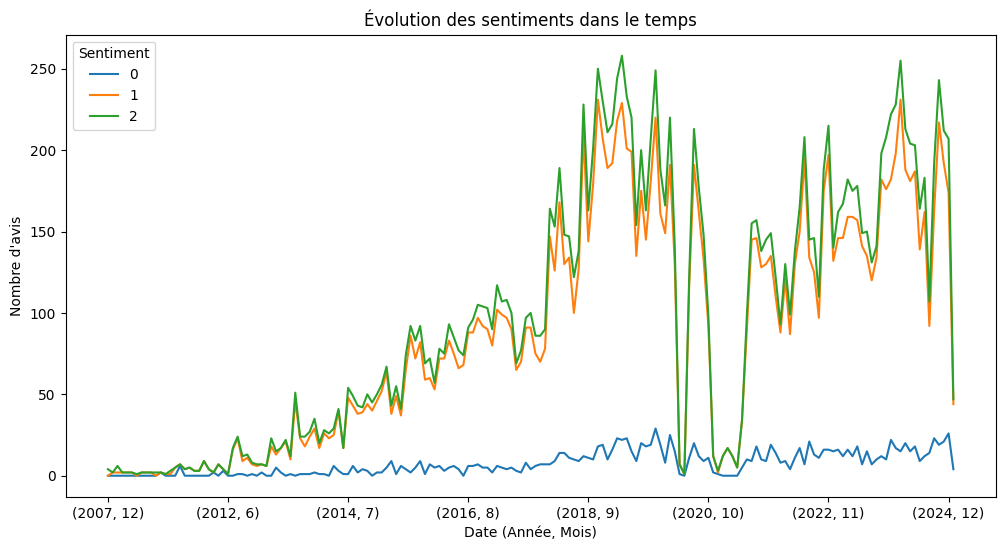

In [10]:
import matplotlib.pyplot as plt

# Calculer la répartition des sentiments par mois
sentiments_par_mois = avis_restaurants.groupby(['year', 'month', 'sentiment']).size().unstack().fillna(0)

# Visualiser l'évolution
sentiments_par_mois.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title("Évolution des sentiments dans le temps")
plt.xlabel("Date (Année, Mois)")
plt.ylabel("Nombre d'avis")
plt.legend(title="Sentiment")
plt.show()

# Résumé Automatique des Avis

Pour un restaurant

In [11]:
from transformers import pipeline

# Chargement du pipeline de résumé
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour segmenter les avis en morceaux de taille raisonnable
def segmenter_avis(texte, taille_segment=100):
    mots = texte.split()
    for i in range(0, len(mots), taille_segment):
        yield ' '.join(mots[i:i + taille_segment])

# Fonction pour résumer automatiquement les avis
def resumer_avis_restaurant(avis, taille_segment=100, max_length=15, min_length=5):
    segments = list(segmenter_avis(avis, taille_segment))
    resumes = []
    
    for segment in segments:
        try:
            resume = summarizer(segment, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            resumes.append(resume)
        except Exception as e:
            resumes.append(f"Erreur lors du résumé : {str(e)}")
    
    # Combinaison des résumés partiels en un résumé global, limité à 15 mots maximum
    resume_global = ' '.join(resumes)
    return ' '.join(resume_global.split()[:15])  # Limite à 15 mots

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


In [12]:
# Exemple : Avis pour un seul restaurant
nom_restaurant = "Le Bouchon des Filles"
avis_selec = avis_restaurants[avis_restaurants['restaurant'] == nom_restaurant]['review_cleaned'].str.cat(sep=' ')

# Génération du résumé
resume_restaurant = resumer_avis_restaurant(avis_selec)

# Affichage du résultat limité à 15 mots
print(f"Résumé des avis pour {nom_restaurant} :\n{resume_restaurant}")

Résumé des avis pour Le Bouchon des Filles :
trop bon moment accueil plat ambiance tout passer bon moment entre amis jai cherché pommes


Pour plusieurs restaurants

In [13]:
from transformers import pipeline
import pandas as pd

# Chargement du pipeline de résumé
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour segmenter les avis en morceaux de taille raisonnable
def segmenter_avis(texte, taille_segment=300):
    mots = texte.split()
    for i in range(0, len(mots), taille_segment):
        yield ' '.join(mots[i:i + taille_segment])

# Fonction pour résumer les avis d'un restaurant donné
def resumer_avis(avis, taille_segment=300, max_length=10, min_length=5):
    segments = list(segmenter_avis(avis, taille_segment))
    resumes = []
    
    for segment in segments:
        try:
            resume = summarizer(segment, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            resumes.append(resume)
        except Exception as e:
            resumes.append(f"Erreur lors du résumé : {str(e)}")
    
    # Combinaison des résumés partiels en un résumé global
    resume_global = ' '.join(resumes)
    return ' '.join(resume_global.split()[:10])  # Limite à 15 mots

# Fonction pour générer les résumés pour chaque restaurant à partir de plusieurs avis
def resumer_avis_par_restaurant(dataframe, taille_segment=300):
    resultats = []
    
    for restaurant, avis_groupes in dataframe.groupby("restaurant"):
        # Concaténer tous les avis du restaurant en une seule chaîne de texte
        texte_avis = ' '.join(avis_groupes['review_cleaned'].tolist())
        resume_avis = resumer_avis(texte_avis, taille_segment)
        resultats.append({"restaurant": restaurant, "resume_avis": resume_avis})
    
    return pd.DataFrame(resultats)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


In [14]:
# Génération des résumés
resume_df = resumer_avis_par_restaurant(avis_restaurants)

# Affichage des résultats
print(resume_df)

                        restaurant  \
0  Frazarin Bistrot Franco Italien   
1            Le Bouchon des Filles   
2              Le Grand Réfectoire   
3            Les Terrasses de Lyon   

                                         resume_avis  
0  restaurant de passionnés avec une belle histoi...  
1  l'ambiance, plats, le croustillant de bou le c...  
2  Lieu historique que j le service est bon, du p...  
3  service brouillon à revoir dîner is a very goo...  


ou

In [11]:
from transformers import pipeline
import pandas as pd
from concurrent.futures import ThreadPoolExecutor

# Chargement du pipeline de résumé
summarizer = pipeline("summarization", model="t5-small", tokenizer="t5-small")

# Fonction pour segmenter les avis en morceaux de taille raisonnable
def segmenter_avis(texte, taille_segment=200):
    mots = texte.split()
    for i in range(0, len(mots), taille_segment):
        yield ' '.join(mots[i:i + taille_segment])

# Fonction pour résumer les avis
def resumer_avis(avis, taille_segment=200, max_length=15, min_length=5):
    segments = list(segmenter_avis(avis, taille_segment))
    resumes = []
    
    for segment in segments:
        try:
            resume = summarizer(segment, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
            resumes.append(resume)
        except Exception as e:
            resumes.append(f"Erreur lors du résumé : {str(e)}")
    
    # Combinaison des résumés partiels en un résumé global
    resume_global = ' '.join(resumes)
    return ' '.join(resume_global.split()[:15])  # Limite à 15 mots

# Fonction pour générer les résumés pour chaque restaurant
def resumer_avis_par_restaurant(dataframe, taille_segment=200):
    resultats = []
    
    # Utilisation de ThreadPoolExecutor pour paralléliser les appels
    with ThreadPoolExecutor() as executor:
        futures = []
        
        for restaurant, avis_groupes in dataframe.groupby("restaurant"):
            # Concaténer tous les avis du restaurant en une seule chaîne de texte
            texte_avis = ' '.join(avis_groupes['review_cleaned'].tolist())
            futures.append(executor.submit(resumer_avis, texte_avis, taille_segment))
        
        for future in futures:
            resume_avis = future.result()
            resultats.append({"restaurant": future, "resume_avis": resume_avis})

    return pd.DataFrame(resultats)

e:\Application\Anaconda\envs\Nlp_projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Device set to use 0


In [ ]:
# Génération des résumés
resume_df = resumer_avis_par_restaurant(avis_restaurants)

# Affichage des résultats
print(resume_df)

Your max_length is set to 15, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


# Comparer les sentiments ou thèmes avec les notes attribuées

Ajouter une analyse descriptive des notes par sentiment

sentiment_rating
Neutre     3.000000
Négatif    1.690377
Positif    4.757828
Name: rating, dtype: float64


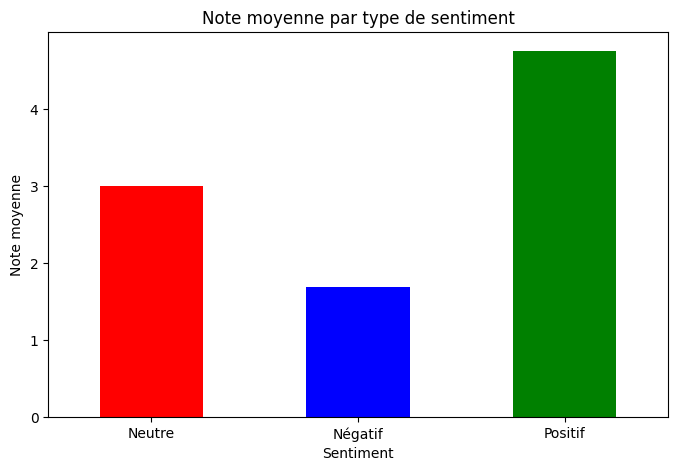

In [19]:
# Calculer la note moyenne par sentiment
sentiment_note_moyenne = avis_restaurants.groupby('sentiment_rating')['rating'].mean()
print(sentiment_note_moyenne)

# Visualiser avec un graphique
import matplotlib.pyplot as plt

sentiment_note_moyenne.plot(kind='bar', color=['red', 'blue', 'green'], figsize=(8, 5))
plt.title("Note moyenne par type de sentiment")
plt.ylabel("Note moyenne")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.show()


Analyse des thèmes les plus fréquents par note

In [20]:
from collections import Counter

# Fonction pour obtenir les mots fréquents selon la note
def mots_frequents_par_note(data, note_min, note_max):
    avis = data[(data['rating'] >= note_min) & (data['rating'] <= note_max)]['review_cleaned']
    tous_mots = ' '.join(avis).split()
    return Counter(tous_mots).most_common(10)

# Exemples pour différentes plages de notes
mots_notes_basses = mots_frequents_par_note(avis_restaurants, 1, 2)
mots_notes_moyennes = mots_frequents_par_note(avis_restaurants, 3, 3)
mots_notes_hautes = mots_frequents_par_note(avis_restaurants, 4, 5)

print("Mots fréquents (notes basses) :", mots_notes_basses)
print("Mots fréquents (notes moyennes) :", mots_notes_moyennes)
print("Mots fréquents (notes hautes) :", mots_notes_hautes)

Mots fréquents (notes basses) : [('très', 186), ('plat', 179), ('service', 159), ('restaurant', 133), ('plus', 123), ('bien', 103), ('sans', 103), ('tout', 97), ('table', 93), ('avon', 85)]
Mots fréquents (notes moyennes) : [('très', 347), ('plat', 289), ('service', 257), ('plus', 190), ('peu', 176), ('avon', 161), ('sans', 147), ('bon', 144), ('bien', 138), ('restaurant', 135)]
Mots fréquents (notes hautes) : [('très', 3137), ('plat', 1645), ('service', 1533), ('bon', 1137), ('restaurant', 1059), ('bien', 1040), ('cuisine', 1010), ('avon', 993), ('tout', 903), ('qualité', 849)]


# Analyse intra-restaurant : Comparaison avant/après une date

Diviser les données en deux périodes

In [21]:
# Assurez-vous que la colonne 'date_review' est bien de type datetime
avis_restaurants['date_review'] = pd.to_datetime(avis_restaurants['date_review'], errors='coerce')


In [22]:
# Définir une date de seuil
date_seuil = '2024-01-01'

# Créer une colonne pour indiquer si l'avis est avant ou après la date
avis_restaurants['periode'] = avis_restaurants['date_review'].apply(
    lambda x: 'Avant' if x < pd.to_datetime(date_seuil) else 'Après'
)

# Vérifier la distribution des avis par période
print(avis_restaurants['periode'].value_counts())


periode
Avant    3428
Après     697
Name: count, dtype: int64


Analyser les sentiments par période

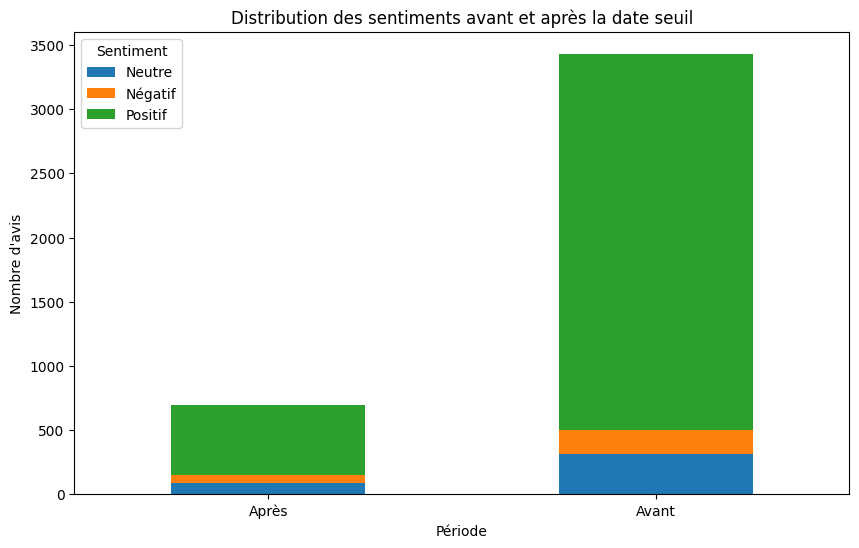

In [23]:
# Distribution des sentiments par période
sentiments_par_periode = avis_restaurants.groupby(['periode', 'sentiment_rating']).size().unstack().fillna(0)

# Visualiser avec un graphique
sentiments_par_periode.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribution des sentiments avant et après la date seuil")
plt.xlabel("Période")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=0)
plt.legend(title="Sentiment")
plt.show()


Comparer les notes avant et après la date

periode
Après    4.274032
Avant    4.434656
Name: rating, dtype: float64


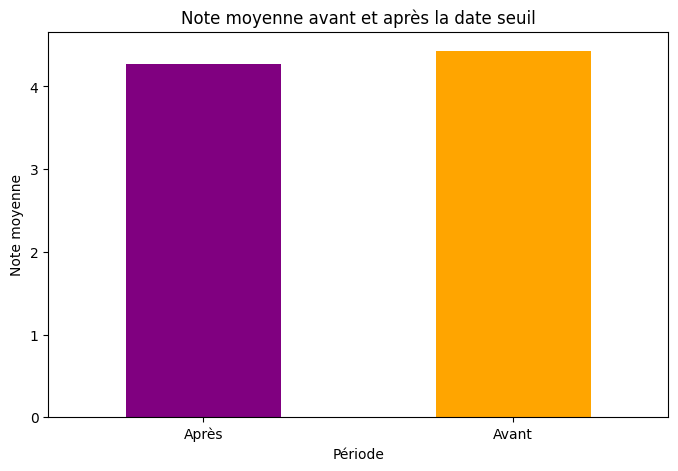

In [24]:
# Note moyenne par période
note_moyenne_par_periode = avis_restaurants.groupby('periode')['rating'].mean()
print(note_moyenne_par_periode)

# Visualiser
note_moyenne_par_periode.plot(kind='bar', color=['purple', 'orange'], figsize=(8, 5))
plt.title("Note moyenne avant et après la date seuil")
plt.ylabel("Note moyenne")
plt.xlabel("Période")
plt.xticks(rotation=0)
plt.show()

# Nuages de mots interactifs.

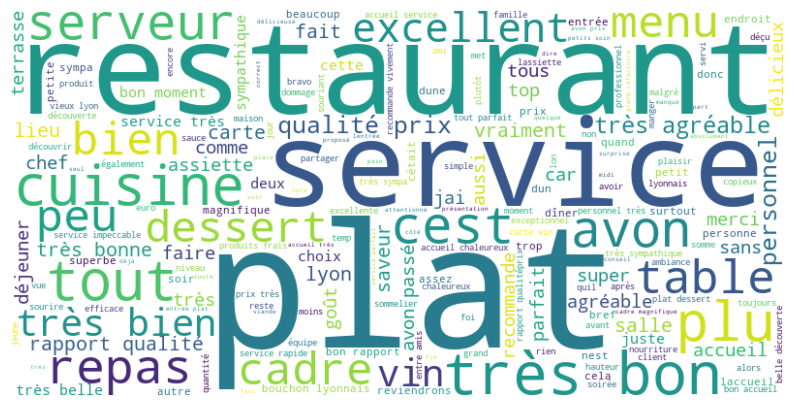

In [26]:
#Nuage de mots
from wordcloud import WordCloud 

# Concaténer tous les avis
tous_avis = ' '.join(avis_restaurants['review_cleaned'])

# Créer un nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(tous_avis)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


